In [9]:
import subprocess
import time
import math
import matplotlib.pyplot as plt
import numpy as np


In [4]:
start_time = time.time()
subprocess.run(["/content/file1", str(100000)], capture_output=True)
end_time = time.time()
end_time - start_time

0.007873058319091797

In [5]:
!chmod +x /content/file1

In [7]:
!chmod +x /content/file2

In [8]:
start_time = time.time()
subprocess.run(["/content/file2", str(100000)], capture_output=True)
end_time = time.time()
end_time - start_time

0.00257110595703125

In [10]:
def run_executable(executable, input_size):
    start_time = time.time()
    subprocess.run([executable, str(input_size)], capture_output=True)
    end_time = time.time()
    return end_time - start_time

In [18]:
def analyze_executables():
    executables = ["/content/file1", "/content/file2"]  # Adjust paths as needed
    input_sizes = [10**i for i in range(2, 6)]  # 10^2 to 10^5

    plt.figure(figsize=(10, 6))

    for executable in executables:
        times = []
        for size in input_sizes:
            execution_time = run_executable(executable, size)
            times.append(execution_time)

        # Plot log-log graph
        plt.loglog(input_sizes, times, marker='o', label=executable)

        # Estimate complexity
        log_sizes = [math.log(size) for size in input_sizes]
        log_times = [math.log(time) for time in times]
        slope, _ = np.polyfit(log_sizes, log_times, 1)

        complexity ="O(1)" if slope < 0.8 else "O(n)" if slope < 1.5 else "O(n^2)" if slope < 2.5 else "O(n^3)"
        print(f"{executable} estimated complexity: {complexity} (slope: {slope:.2f})")

    plt.xlabel("Input Size")
    plt.ylabel("Execution Time (s)")
    plt.title("Execution Time vs Input Size")
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.savefig("complexity_analysis.png")
    plt.close()

    # Analyze output to determine what the code does
    sample_output = subprocess.run(["/content/file2", "100"], capture_output=True, text=True).stdout
    print(f"Sample output for analysis:\n{sample_output}")
    print("Based on the output, analyze the pattern to determine what the code does.")

/content/file1 estimated complexity: O(1) (slope: -0.01)
/content/file2 estimated complexity: O(1) (slope: -0.19)


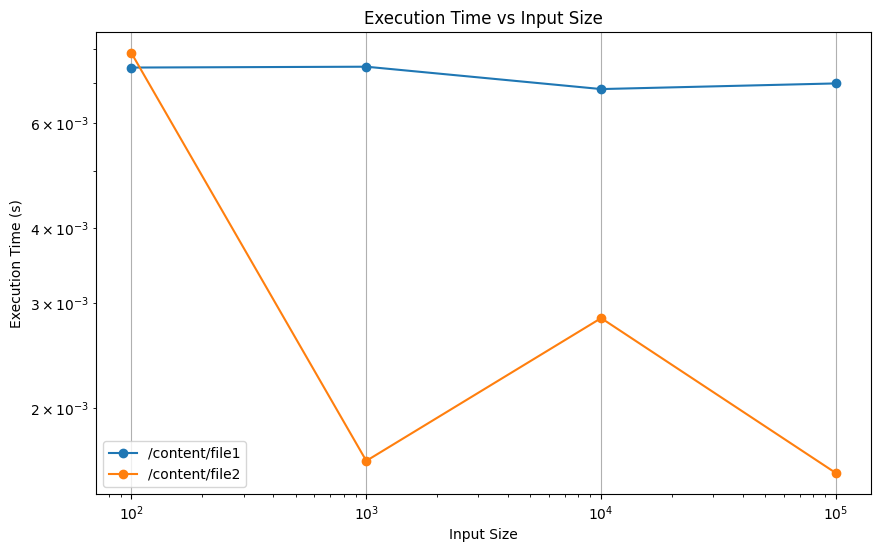

Sample output for analysis:
Enter the input size: result = 0

Based on the output, analyze the pattern to determine what the code does.


In [19]:
analyze_executables()

In [23]:
!exec ./file1


Enter the input size: 10
result = 5.500000


In [25]:
!exec ./file2

Enter the input size: 20
result = 210
